In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [60]:
import glob
df=pd.read_csv("/kaggle/input/sample/sample/sample_labels.csv")
df=df.rename(columns={"Finding Labels":"label"})
df['label'] = df['label'].apply(lambda x: x.split('|')[0])
df['Patient Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
files=pd.DataFrame(glob.glob('/kaggle/input/sample/sample/images/**.png'))
files=files.rename(columns={0:'images'})
df=pd.concat([files,df],axis=1)
df.head()

,images,Image Index,label,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,/kaggle/input/sample/sample/images/00006199_01...,00000013_005.png,Emphysema,5,13,60,M,AP,3056,2544,0.139,0.139
1,/kaggle/input/sample/sample/images/00003503_00...,00000013_026.png,Cardiomegaly,26,13,57,M,AP,2500,2048,0.168,0.168
2,/kaggle/input/sample/sample/images/00017423_00...,00000017_001.png,No Finding,1,17,77,M,AP,2500,2048,0.168,0.168
3,/kaggle/input/sample/sample/images/00022830_00...,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,0.143
4,/kaggle/input/sample/sample/images/00016794_00...,00000032_001.png,Cardiomegaly,1,32,55,F,AP,2500,2048,0.168,0.168


In [61]:
print('no. of unique labels are :',df['label'].nunique())
print('there respective counts are :\n',df['label'].value_counts())

no. of unique labels are : 15
there respective counts are :
 No Finding            3044
Infiltration           624
Atelectasis            508
Effusion               393
Consolidation          161
Nodule                 159
Mass                   148
Cardiomegaly           126
Pneumothorax           114
Edema                   94
Emphysema               85
Pleural_Thickening      72
Fibrosis                57
Pneumonia               14
Hernia                   7
Name: label, dtype: int64


In [62]:
df.isnull().sum()

images                         0
Image Index                    0
label                          0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImageWidth             0
OriginalImageHeight            0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

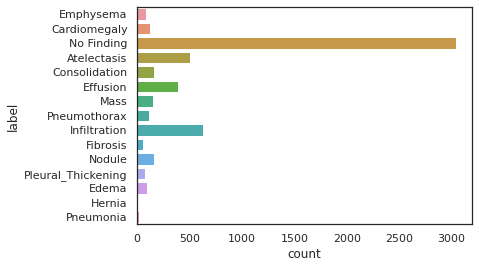

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=df['label'],data=df)

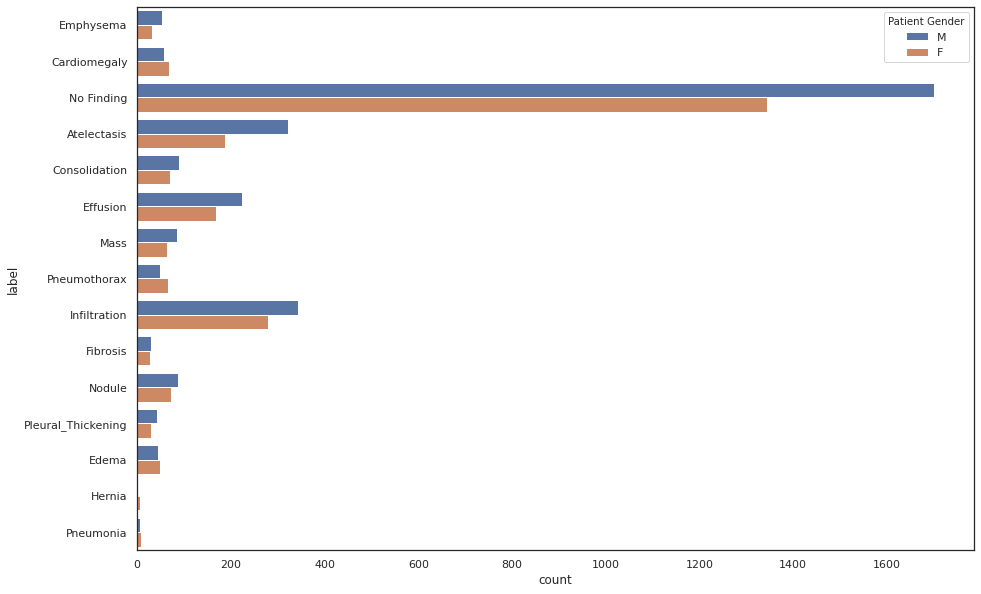

In [64]:
plt.figure(figsize=(15,10))
sns.countplot(y="label", hue='Patient Gender', data=df)

In [65]:
labels = ['Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Atelectasis','Pneumothorax','Consolidation','Pleural_Thickening','Edema','Emphysema','Fibrosis','Hernia','Pneumonia']

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


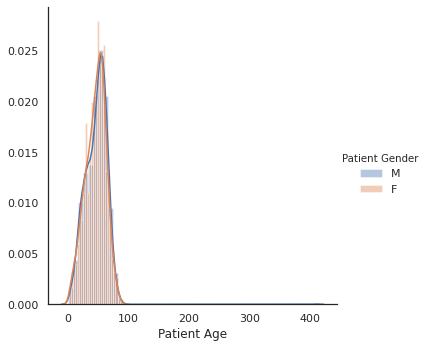

In [66]:
sns.FacetGrid(data=df,hue='Patient Gender',size=5).map(sns.distplot,'Patient Age').add_legend()
plt.show()

In [67]:
df1=df[df['label'] != "No Finding"]   
#df1=df1[df1['label']!= "Hernia"]

df1 = df1.reset_index(drop=True)
df1.head()

,images,Image Index,label,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,/kaggle/input/sample/sample/images/00006199_01...,00000013_005.png,Emphysema,5,13,60,M,AP,3056,2544,0.139,0.139
1,/kaggle/input/sample/sample/images/00003503_00...,00000013_026.png,Cardiomegaly,26,13,57,M,AP,2500,2048,0.168,0.168
2,/kaggle/input/sample/sample/images/00022830_00...,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,0.143
3,/kaggle/input/sample/sample/images/00016794_00...,00000032_001.png,Cardiomegaly,1,32,55,F,AP,2500,2048,0.168,0.168
4,/kaggle/input/sample/sample/images/00010790_03...,00000040_003.png,Consolidation,3,40,68,M,PA,2500,2048,0.168,0.168


In [68]:
df1 = df1[['Image Index','images','label']]
dummy_var = pd.get_dummies(df1['label'])
dummy_var=dummy_var.astype(float)
df1=pd.concat([df1,dummy_var],axis=1)
df1.head()

,Image Index,images,label,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,/kaggle/input/sample/sample/images/00006199_01...,Emphysema,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000013_026.png,/kaggle/input/sample/sample/images/00003503_00...,Cardiomegaly,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000030_001.png,/kaggle/input/sample/sample/images/00022830_00...,Atelectasis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000032_001.png,/kaggle/input/sample/sample/images/00016794_00...,Cardiomegaly,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000040_003.png,/kaggle/input/sample/sample/images/00010790_03...,Consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Display Random Images


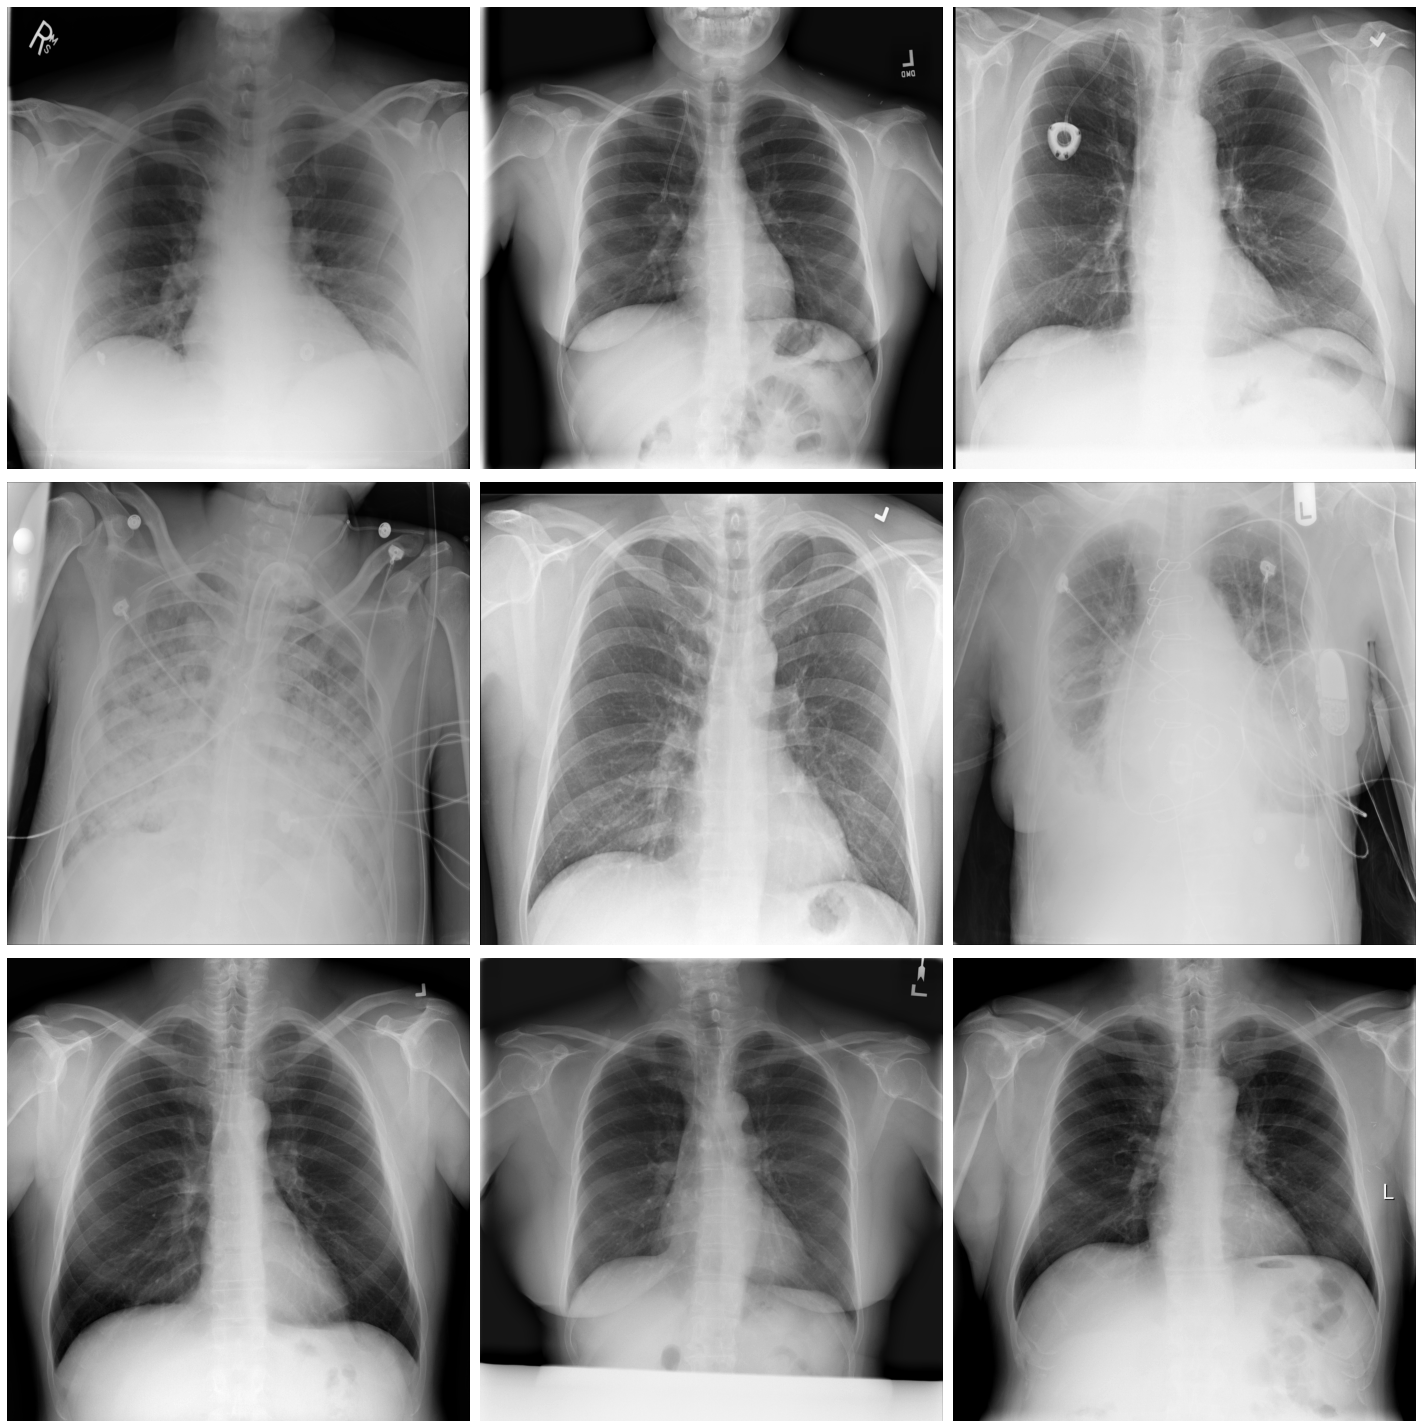

In [39]:
import matplotlib.pyplot as plt
images1 = df1['images']
# Extract 9 random images from it
random_images = [np.random.choice(images1) for i in range(9)]

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,20))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3,3, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

In [12]:
from sklearn.model_selection import ShuffleSplit
from tensorflow import keras 
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split 

train_df ,test_df= train_test_split(df1, test_size=0.20,stratify = df1['label'],random_state=42)
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)
train_df.head(5)

,Image Index,images,label,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00006462_010.png,/kaggle/input/sample/sample/images/00011481_01...,Atelectasis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002003_006.png,/kaggle/input/sample/sample/images/00021996_00...,Infiltration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,00016493_003.png,/kaggle/input/sample/sample/images/00012628_06...,Effusion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00008267_000.png,/kaggle/input/sample/sample/images/00006949_00...,Fibrosis,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00026275_009.png,/kaggle/input/sample/sample/images/00002843_00...,Effusion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
train_df, valid_df = train_test_split(train_df, 
                                   test_size = 0.10, 
                                   random_state = 42,
                                   stratify = train_df['label'])
print('train', train_df.shape[0], 'valid', valid_df.shape[0])
train_df=train_df.reset_index(drop=True)
valid_df=valid_df.reset_index(drop=True)

train 1844 valid 205


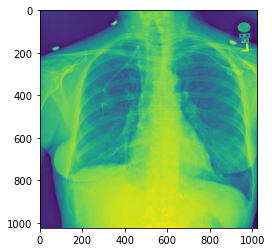

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/kaggle/input/sample/sample/sample/images/00004490_006.png')

imgplot = plt.imshow(img)

In [16]:
labels = ['Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Atelectasis','Pneumothorax','Consolidation','Pleural_Thickening','Edema','Emphysema','Fibrosis','Hernia','Pneumonia']

In [17]:
def get_train_generator(df, x_col, y_cols, shuffle=True, batch_size=16, seed=1, target_w = 128, target_h = 128):
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
        #rotation_range=45,
        #width_shift_range=.15,
        #height_shift_range=.15,
        #horizontal_flip=True,
        #zoom_range=0.5)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [18]:
def get_test_and_valid_generator(test_df, train_df,valid_df, x_col, y_cols, sample_size=100, batch_size=16, seed=1, target_w = 128, target_h = 128):
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        x_col="images", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    
    
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))


    return test_generator,valid_generator

In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = get_train_generator(train_df,"images",labels)
test_generator,valid_generator= get_test_and_valid_generator(test_df,train_df,valid_df, "images",labels)

Found 1844 validated image filenames.
Found 1844 validated image filenames.
Found 513 validated image filenames.
Found 205 validated image filenames.


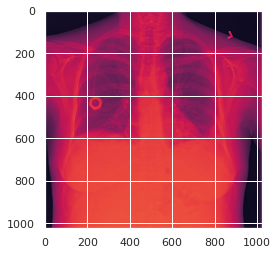

In [48]:
img=mpimg.imread(train_df['images'][0])

raw_img = plt.imshow(img)

The dimensions of the image are 128 pixels width and 128 pixels height
The maximum pixel value is 3.2246 and the minimum is -2.7593
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


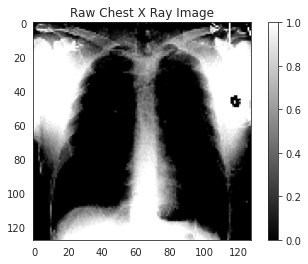

In [36]:
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixel')

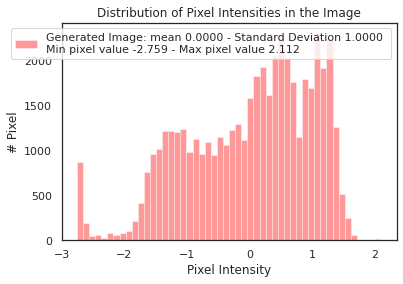

In [57]:
# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

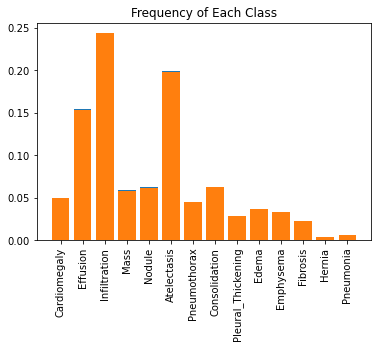

In [20]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(test_generator.labels, axis=0))
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [21]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model

In [22]:
def compute_class_freqs(labels):
    
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies
    
    return positive_frequencies, negative_frequencies

freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.04934924, 0.15347072, 0.24349241, 0.05748373, 0.06182213,
       0.19793926, 0.04446855, 0.06290672, 0.02819957, 0.03687636,
       0.03308026, 0.02223427, 0.0032538 , 0.00542299])

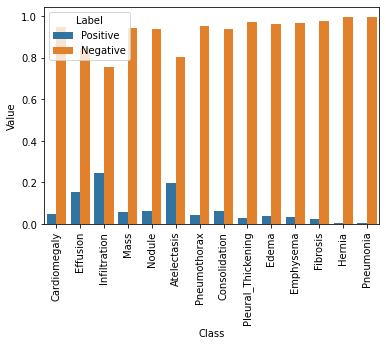

In [23]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [24]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights


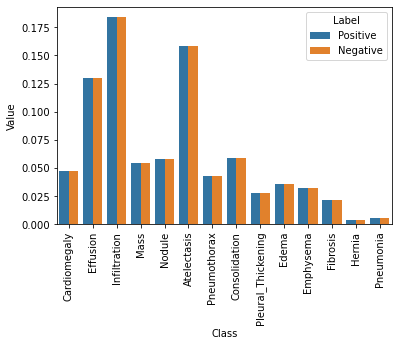

In [25]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [26]:
from keras import backend as K
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        
        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += loss_pos + loss_neg
        return loss

    return weighted_loss


In [27]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.densenet import DenseNet121
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from tensorflow.keras import regularizers 

In [28]:
# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
from tensorflow.keras import initializers
initializer_1 = tf.keras.initializers.he_normal()
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu',input_shape = (128,128,3)))#,kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())


model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))#,kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

          
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))#,kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))#,kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())

          
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))#,kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = 3))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())


# add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(len(labels), activation = 'softmax'))

learning_rate = 0.01
#decay_rate = learning_rate / epochs
momentum = 0.9

#opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD")
# compile model, run summary
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights,neg_weights), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        1

In [29]:

checkpointer = ModelCheckpoint(filepath='weights.best.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only = True)
callbacks_list = [checkpointer]


In [30]:
batch_size=16
history=model.fit_generator(generator=train_generator,steps_per_epoch=(train_generator.n)//batch_size,epochs = 10,callbacks = callbacks_list,validation_data=(valid_generator))

Epoch 1/10
115/115 [==============================] - ETA: 0s - loss: 2.1192 - accuracy: 0.2068
Epoch 00001: val_loss improved from inf to 2.09606, saving model to weights.best.01-2.10.hdf5
115/115 [==============================] - 71s 618ms/step - loss: 2.1192 - accuracy: 0.2068 - val_loss: 2.0961 - val_accuracy: 0.2488
Epoch 2/10
115/115 [==============================] - ETA: 0s - loss: 2.0911 - accuracy: 0.2226
Epoch 00002: val_loss improved from 2.09606 to 2.08608, saving model to weights.best.02-2.09.hdf5
115/115 [==============================] - 44s 386ms/step - loss: 2.0911 - accuracy: 0.2226 - val_loss: 2.0861 - val_accuracy: 0.2488
Epoch 3/10
115/115 [==============================] - ETA: 0s - loss: 2.0877 - accuracy: 0.2358
Epoch 00003: val_loss improved from 2.08608 to 2.08532, saving model to weights.best.03-2.09.hdf5
115/115 [==============================] - 44s 384ms/step - loss: 2.0877 - accuracy: 0.2358 - val_loss: 2.0853 - val_accuracy: 0.2439
Epoch 4/10
115/115 [

In [33]:
deep_model_predictions=model.predict(test_generator)

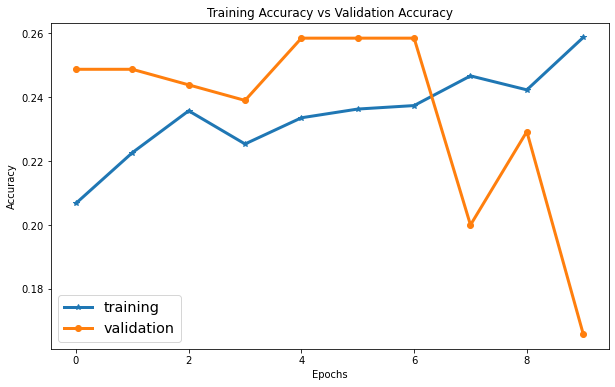

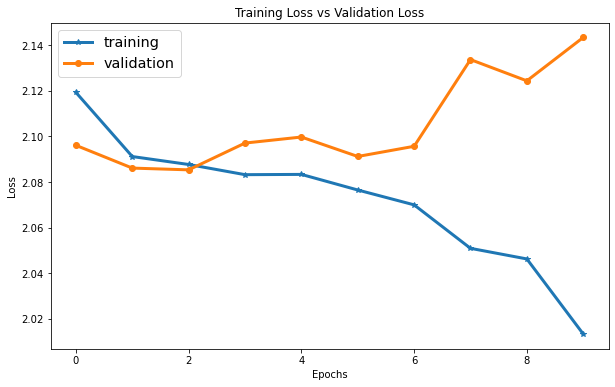

In [32]:
lw = 3
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()


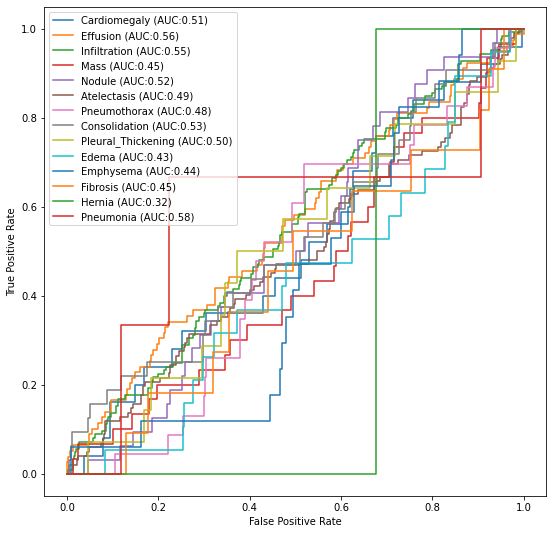

In [35]:
from sklearn.metrics import roc_curve, auc

# create plot
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (i, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_generator.labels[:,i].astype(int), deep_model_predictions[:,i])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))

# Set labels for plot
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('quick_trained_model.png')

In [58]:
model.save_weights('CNN.h5')
pd.DataFrame.from_dict(history.history).to_csv('CNN.csv', index = False)